# INF-616 - Exercício desbalanceamento

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

In [1]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score, train_test_split)

import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def describe(x, y, classes):
    print('amostras:', x.shape[0])
    print('características:', x.shape[1])

    _, counts = np.unique(y, return_counts=True)
    print('frequência das classes:', dict(zip(classes, counts)))

def show_datasets(x, y, title):
    e = make_pipeline(
        StandardScaler(),
        PCA(n_components=2)
    ).fit_transform(x)

    plt.figure(figsize=(12, 6))
    plt.scatter(e[:, 0], e[:, 1], c=y)
    plt.title(title)
    plt.axis('off')

def train_and_evaluate(model, train, test):
    model.fit(*train)
    pv = model.predict(test[0])
    print(metrics.classification_report(test[1], pv),
          'Matriz de confusao:',
          metrics.confusion_matrix(test[1], pv), sep='\n')

In [3]:
x, y = datasets.make_classification(
    n_classes=3, class_sep=1, weights=[0.05, 0.85, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1, n_samples=1024, random_state=210)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=9817)

# Use um estimador que possua pouca regularizacao:
base_model = SVC(C=0.001)

amostras: 768
características: 20
frequência das classes: {'A': 38, 'B': 657, 'C': 73}
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        14
          1       0.83      1.00      0.91       213
          2       0.00      0.00      0.00        29

avg / total       0.69      0.83      0.76       256

Matriz de confusao:
[[  0  14   0]
 [  0 213   0]
 [  0  29   0]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


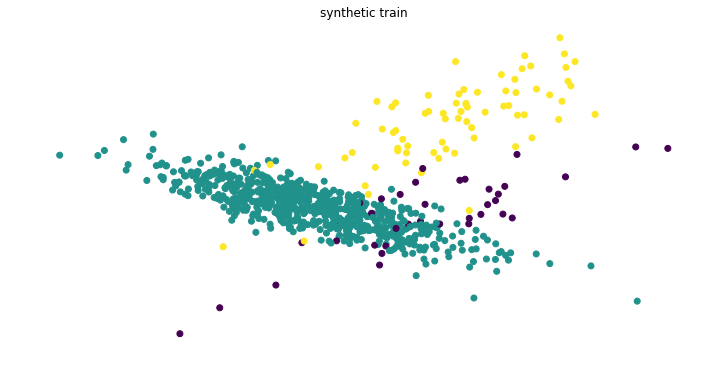

In [4]:
describe(x_train, y_train, ['A', 'B', 'C'])
show_datasets(x_train, y_train, 'synthetic train')

train_and_evaluate(base_model, (x_train, y_train), (x_test, y_test))

**Balanceie o conjunto utilizando umas das estratégias implementadas em imbalanced-learn e verifique se houve um aumento nas métricas sobre o teste:**

==== Balancer: RandomOverSampler
amostras: 1971
características: 20
frequência das classes: {'A': 657, 'B': 657, 'C': 657}
             precision    recall  f1-score   support

          0       0.31      0.86      0.45        14
          1       0.95      0.87      0.91       213
          2       1.00      0.72      0.84        29

avg / total       0.92      0.86      0.88       256

Matriz de confusao:
[[ 12   2   0]
 [ 27 186   0]
 [  0   8  21]]

==== Balancer: SMOTE
amostras: 1971
características: 20
frequência das classes: {'A': 657, 'B': 657, 'C': 657}
             precision    recall  f1-score   support

          0       0.62      0.71      0.67        14
          1       0.94      0.97      0.95       213
          2       1.00      0.66      0.79        29

avg / total       0.93      0.92      0.92       256

Matriz de confusao:
[[ 10   4   0]
 [  6 207   0]
 [  0  10  19]]

==== Balancer: ADASYN
amostras: 1984
características: 20
frequência das classes: {'A': 665, 'B':

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.05      1.00      0.10        14
          1       0.00      0.00      0.00       213
          2       0.00      0.00      0.00        29

avg / total       0.00      0.05      0.01       256

Matriz de confusao:
[[ 14   0   0]
 [213   0   0]
 [ 29   0   0]]



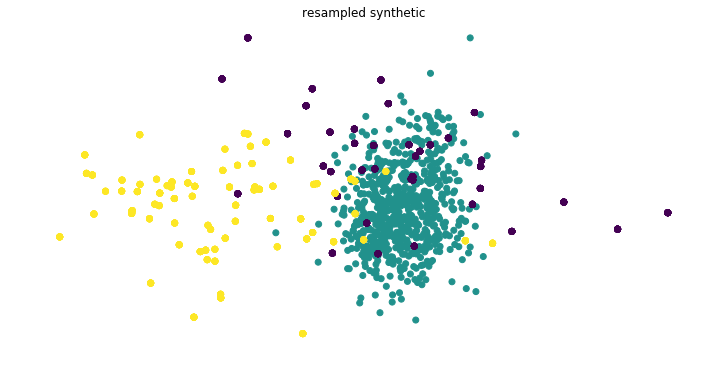

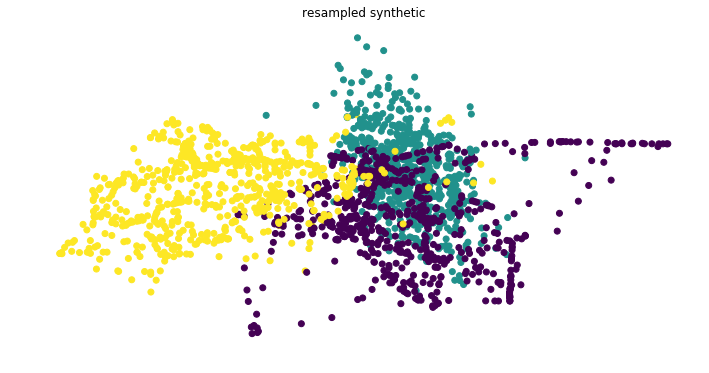

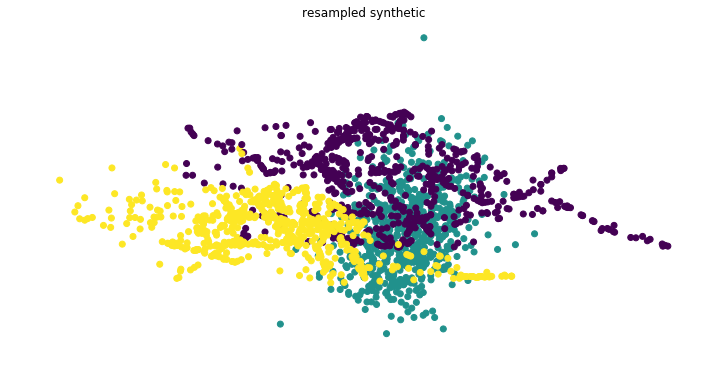

In [6]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

for balancer_class in [RandomOverSampler, SMOTE, ADASYN]:
    print(f'==== Balancer: {balancer_class.__name__}')
    balancer = balancer_class(random_state=0)
    x_resampled, y_resampled = balancer.fit_sample(x_train, y_train)

    describe(x_resampled, y_resampled, ['A', 'B', 'C'])
    show_datasets(x_resampled, y_resampled, 'resampled synthetic')

    train_and_evaluate(base_model, (x_resampled, y_resampled), (x_test, y_test))
    print()